```{contents}
```

## Cost Function


### Reminder: What SVR Does

* SVR doesn’t try to predict exactly each data point.
* Instead, it tries to find a function $f(x) = w^T \phi(x) + b$ that keeps predictions **within a tolerance zone (ε-tube)** around the actual values.
* Errors **inside the ε-tube** are ignored.
* Errors **outside the ε-tube** are penalized.

---

### SVR Cost Function

The optimization problem is:

$$
\min_{w, b, \xi, \xi^*} \quad \frac{1}{2}\|w\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*)
$$

Subject to:

$$
y_i - (w^T \phi(x_i) + b) \leq \epsilon + \xi_i
$$

$$
(w^T \phi(x_i) + b) - y_i \leq \epsilon + \xi_i^*
$$

$$
\xi_i, \xi_i^* \geq 0
$$

---

### Explanation of Each Term

* **$\frac{1}{2}\|w\|^2$** → margin maximization (we want the flattest function).
* **$C \sum (\xi_i + \xi_i^*)$** → penalty for deviations outside ε.
* **$\epsilon$** → size of the tolerance tube.
* **$\xi_i, \xi_i^*$** → slack variables, measure how far outside the tube a point lies.

---

### ε-insensitive Loss Function

The SVR loss is also called the **ε-insensitive loss**:

$$
L_{\epsilon}(y, \hat{y}) =
\begin{cases}
0 & \text{if } |y - \hat{y}| \leq \epsilon \\
|y - \hat{y}| - \epsilon & \text{otherwise}
\end{cases}
$$

👉 Interpretation:

* If prediction is within ±ε of actual → no cost.
* If prediction lies outside → cost grows linearly with distance from the ε-boundary.

---

### Role of Hyperparameters in Cost

* **C (Regularization parameter):**

  * High C → penalizes errors more strongly → tighter fit → may overfit.
  * Low C → allows more slack → smoother function.

* **ε (Epsilon-insensitive zone):**

  * Larger ε → fewer support vectors, simpler model.
  * Smaller ε → more support vectors, sensitive fit.

* **γ (Kernel parameter, e.g. in RBF):**

  * Controls influence of each training point.
  * High γ → each point has small radius of influence → wiggly fit.
  * Low γ → smoother fit.

---

### Visualization of ε-tube Intuition

Imagine the regression line with a tube around it:

* Points **inside the tube** → cost = 0.
* Points **outside** → cost = distance beyond tube.

This is what makes SVR robust — it **ignores small deviations** and only cares about big errors.

---

### Comparison with Other Losses

* **Linear Regression (OLS):** Uses squared loss $(y - \hat{y})^2$.
* **Lasso Regression:** Uses absolute loss $|y - \hat{y}|$.
* **SVR:** Uses **ε-insensitive loss**, which blends the two ideas by **ignoring small errors** and penalizing big ones linearly.

---

**Summary:**
The **SVR cost function** balances two goals:

1. Keep the regression function as flat as possible ($\frac{1}{2}\|w\|^2$).
2. Minimize large prediction errors (ε-insensitive loss, controlled by $C$).



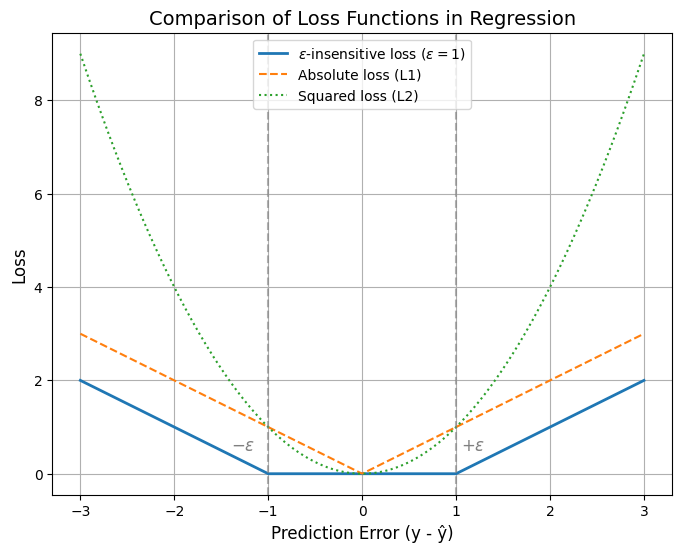

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define loss functions
def epsilon_insensitive_loss(y_true, y_pred, epsilon=1.0):
    error = np.abs(y_true - y_pred)
    return np.maximum(0, error - epsilon)

def squared_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2

def absolute_loss(y_true, y_pred):
    return np.abs(y_true - y_pred)

# Range of prediction errors
errors = np.linspace(-3, 3, 400)
y_true = 0  # assume true value = 0
y_pred = errors  # predictions offset from 0

# Loss values
eps_loss = epsilon_insensitive_loss(y_true, y_pred, epsilon=1.0)
sq_loss = squared_loss(y_true, y_pred)
abs_loss = absolute_loss(y_true, y_pred)

# Plot
plt.figure(figsize=(8,6))
plt.plot(errors, eps_loss, label=r'$\epsilon$-insensitive loss ($\epsilon=1$)', linewidth=2)
plt.plot(errors, abs_loss, label='Absolute loss (L1)', linestyle='--')
plt.plot(errors, sq_loss, label='Squared loss (L2)', linestyle=':')

# Add vertical lines for epsilon boundaries
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.6)
plt.axvline(x=-1, color='gray', linestyle='--', alpha=0.6)
plt.text(1.05, 0.5, r'$+\epsilon$', fontsize=12, color='gray')
plt.text(-1.4, 0.5, r'$-\epsilon$', fontsize=12, color='gray')

plt.title("Comparison of Loss Functions in Regression", fontsize=14)
plt.xlabel("Prediction Error (y - ŷ)", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
